In [1]:
% cd ..
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

1.3.2


In [25]:
df = pd.read_csv('Data/task3.csv')
df

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,JGI5,JGI8,JGI9,JGI10,JGT10,Diameter,Radius,TopoShapeIndex,SRW05,mZagreb2
0,gdb_119938,CN1C(CCO)C1C#N,0.007087,0.105128,0.163232,0.144832,0.242338,0.441770,0.634646,0.649617,...,0.148148,0.0,0.0,0.0,0.589308,0.6,0.5,1.000000,0.755340,0.82
1,gdb_29238,Cc1c[nH]c(=O)[nH]c1=O,0.011360,0.176966,0.202159,0.136248,0.204471,0.473214,0.441339,0.492888,...,0.000000,0.0,0.0,0.0,0.561284,0.4,0.5,0.666667,0.000000,0.66
2,gdb_118356,CCOC(C=O)C1CN1,0.002469,0.158530,0.155749,0.097146,0.243414,0.461180,0.442913,0.502188,...,0.213333,0.0,0.0,0.0,0.403229,0.4,0.5,0.666667,0.682339,0.84
3,gdb_16321,COC12CC1OC2=N,0.011638,0.288933,0.350969,0.071585,0.152862,0.407220,0.639370,0.676969,...,0.000000,0.0,0.0,0.0,0.756757,0.2,0.0,1.000000,0.783233,0.46
4,gdb_18556,O=C1CC2CCCC12,0.013308,0.271696,0.387197,0.095857,0.202888,0.493789,0.504724,0.522429,...,0.000000,0.0,0.0,0.0,0.460210,0.2,0.0,1.000000,0.440594,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19904,gdb_51029,O=CCC1(CCO1)C#N,0.006618,0.151906,0.202875,0.186325,0.194466,0.390140,0.420079,0.536652,...,0.250000,0.0,0.0,0.0,0.550861,0.4,0.5,0.666667,0.000000,0.82
19905,gdb_43257,O=C1C=CC(=O)C11CN1,0.006113,0.282287,0.266861,0.081109,0.201558,0.433618,0.189370,0.345460,...,0.000000,0.0,0.0,0.0,0.524672,0.2,0.0,1.000000,0.755340,0.58
19906,gdb_69681,CC12OC1C1C(C#C)C21,0.011096,0.175333,0.283957,0.088208,0.253040,0.537267,0.733071,0.650438,...,0.250000,0.0,0.0,0.0,0.705926,0.4,0.5,0.666667,0.909294,0.51
19907,gdb_114799,OCC1CC2OC=NC12,0.013045,0.145523,0.232547,0.012762,0.204534,0.456522,0.647244,0.647429,...,0.320000,0.0,0.0,0.0,0.447613,0.4,0.5,0.666667,0.440594,0.68


In [26]:
cols = df.columns

In [27]:
pca = PCA()
pca = pca.fit(df.iloc[:, 2:])
pcs = pca.transform(df.iloc[:, 2:])

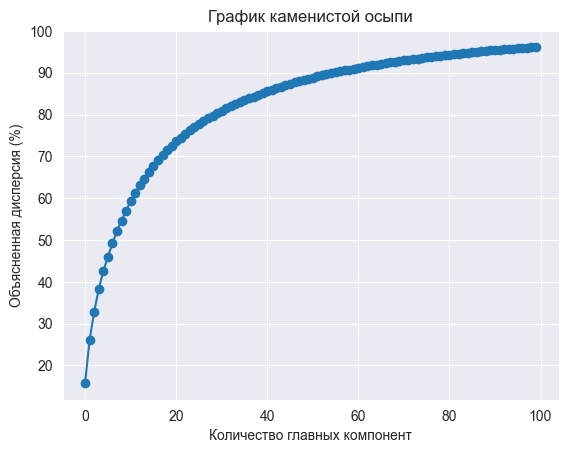

In [28]:
explained_variance_ratio_pca = pca.explained_variance_ratio_

# Строим график каменистой осыпи
plt.plot(np.cumsum(explained_variance_ratio_pca[:100]) * 100, marker='o', linestyle='-')
plt.xlabel('Количество главных компонент')
plt.ylabel('Объясненная дисперсия (%)')
plt.title('График каменистой осыпи')
plt.show()

Так как использование больше 60 компонент не приносит значительного изменения в проценте объясняемой дисперсии, было решено оставить первых 60 компонент для дальнейшего анализа

In [29]:
X = df.drop('gap', axis=1)
X = X.select_dtypes(exclude=['object'])
y = df['gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [32]:
pca = PCA(n_components=60)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

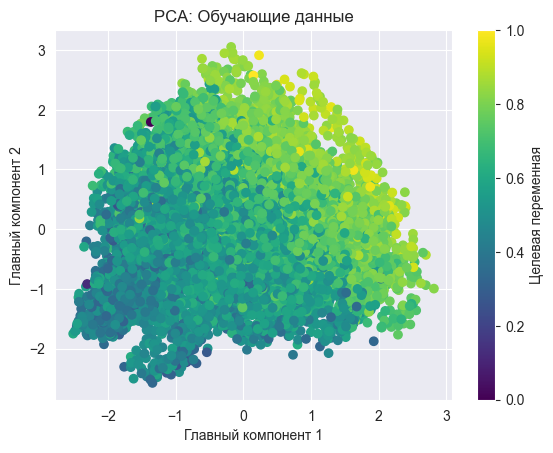

In [33]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.title('PCA: Обучающие данные')
plt.colorbar(label='Целевая переменная')
plt.show()

In [34]:
kpca = KernelPCA()
kpca = kpca.fit_transform(df.iloc[:, 2:])

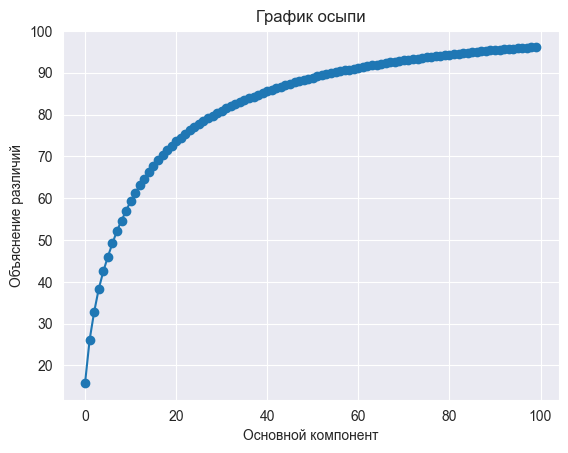

In [35]:
explained_variance = np.var(kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Строим график каменистой осыпи
plt.plot(np.cumsum(explained_variance_ratio[:100]) * 100, marker='o', linestyle='-')
plt.title('График осыпи')
plt.xlabel('Основной компонент')
plt.ylabel('Объяснение различий')
plt.show()

Так как использование больше 60 компонент не приносит значительного изменения в проценте объясняемой дисперсии, было решено оставить первых 60 компонент для дальнейшего анализа

In [36]:
kpca = KernelPCA(n_components=60)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

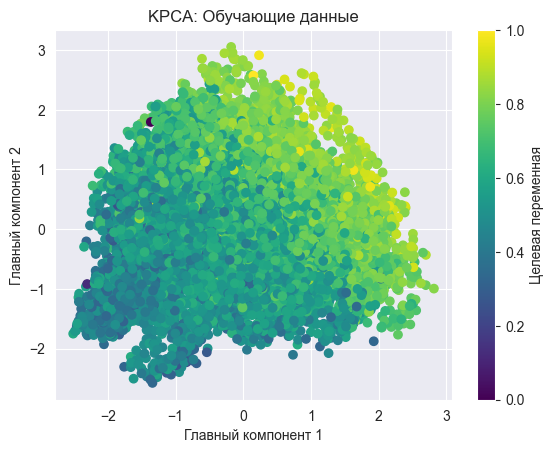

In [37]:
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.title('KPCA: Обучающие данные')
plt.colorbar(label='Целевая переменная')
plt.show()

In [39]:
kpca = KernelPCA(n_components=60)
kpca_data = kpca.fit_transform(df.iloc[:, 2:])
kpca_data = pd.DataFrame(kpca_data)
kpca_data.to_csv('Data/task4_kpca.csv', index=False)

pca = PCA(n_components=60)
pca_data = pca.fit_transform(df.iloc[:, 2:])
pca_data = pd.DataFrame(pca_data)
pca_data.to_csv('Data/task4_pca.csv', index=False)